In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import folium
import geopandas as gpd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import math
import folium
import datetime
from os import listdir
from os.path import isfile, join

from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages


/home/selihadji/.virtualenvs/sorter/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
#RCR = pd.read_csv('/home/selihadji/Documenti/papers/terremoti/dati_gov/Elenco dei Comuni Fuori Cratere da cui risultano perventue RCR.CSV', sep = ';')

In [3]:
#RP = pd.read_csv('/home/selihadji/Documenti/papers/terremoti/dati_gov/Ricostruzione Privata.CSV', sep = ';')

In [4]:
#sinte = pd.read_csv('/home/selihadji/Documenti/papers/terremoti/dati_gov/Sintesi della Ricostruzione nel Territorio.CSV', sep = ';')

In [5]:
#dist = pd.read_csv('/home/selihadji/Documenti/papers/terremoti/distance_from_epicenter2.csv')

In [6]:
#sinte['RCR Presentate VS Attese tasso di copertura(%) '] = sinte['RCR Presentate VS Attese tasso di copertura(%) '].str.replace('%', '')
#sinte['RCR Presentate VS Attese tasso di copertura(%) '] = sinte['RCR Presentate VS Attese tasso di copertura(%) '].str.replace(',', '.')
#sinte['RCR Presentate VS Attese tasso di copertura(%) '] = pd.to_numeric(sinte['RCR Presentate VS Attese tasso di copertura(%) '])

In [7]:
#RP['DOMANDE / EDIFICI INAGIBILI DL'] = RP['DOMANDE / EDIFICI INAGIBILI DL'].str.replace('%', '')
#RP['DOMANDE / EDIFICI INAGIBILI DL'] = RP['DOMANDE / EDIFICI INAGIBILI DL'].str.replace(',', '.')
#RP['DOMANDE / EDIFICI INAGIBILI DL'] = pd.to_numeric(RP['DOMANDE / EDIFICI INAGIBILI DL'])

In [8]:
#RP['DOMANDE / EDIFICI INAGIBILI DL.1'] = RP['DOMANDE / EDIFICI INAGIBILI DL.1'].str.replace('%', '')
##RP['DOMANDE / EDIFICI INAGIBILI DL.1'] = RP['DOMANDE / EDIFICI INAGIBILI DL.1'].str.replace(',', '.')
#RP['DOMANDE / EDIFICI INAGIBILI DL.1'] = pd.to_numeric(RP['DOMANDE / EDIFICI INAGIBILI DL.1'])

In [9]:
variaz_ = pd.read_csv('/home/selihadji/Documenti/papers/terremoti/variaz_phone.csv')

In [10]:
variaz_

,Comune,Cratere Centro Italia 2016,Variaz
0,Abbateggio,0,14.463097
1,Acciano,0,14.871586
2,Accumoli,1,50.164385
3,Acquacanina,1,34.796726
4,Acqualagna,0,9.514810
...,...,...,...
658,Villa Santa Lucia degli Abruzzi,0,10.222365
659,Villamagna,0,4.337131
660,Visso,1,39.940610
661,Viterbo,0,7.166067


In [11]:
variaz = variaz_[variaz_['Cratere Centro Italia 2016'] == 1]

In [12]:
variaz['Comune'] = variaz['Comune'].str.lower()
#RP['Comune'] = RP['Comune'].str.lower()
#RCR['Comune'] = RCR['Comune'].str.lower()
#sinte['Comune'] = sinte['Comune'].str.lower()
#dist['Comune'] = dist['Comune'].str.lower()

/home/selihadji/.virtualenvs/sorter/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
#dataset = pd.merge(variaz, RP, on = 'Comune', how='left').merge(sinte, on='Comune').merge(dist,on='Comune')
#dataset.drop(['Cratere Centro Italia 2016', 'PROVINCIA',  'PR','Amministrativi', 'Tecnici','Altro', 'TOT', 'Totale '], axis = 1, inplace = True)

In [14]:
#dataset.PROVINCIA.unique()

In [15]:
variaz[variaz['Comune'] == 'pievebovigliana']

,Comune,Cratere Centro Italia 2016,Variaz
470,pievebovigliana,1,32.57768


In [16]:
aida = pd.read_csv('/home/selihadji/Documenti/papers/terremoti/AIDA/aida_crateri2.csv')

/home/selihadji/.virtualenvs/sorter/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#aziende prima del terremoto attive fino al 2016
def attive_2016(row):
    if (row['costituzione_year'] <= 2015) and (row['Stato giuridico'] == 'Attiva' or row['Stato giuridico'] == 'Attiva (Amministrazione Controllata)'):
        return 1
    if row['Stato giuridico'] == 'Cessata (In liquidazione)' or row['Stato giuridico'] == 'Cessata (Fusione)' or row['Stato giuridico'] == 'Fallita'or row['Stato giuridico'] == 'In liquidazione' or row['Stato giuridico'] =='Cessata'or row['Stato giuridico'] =='Cessata (Chiusura per fallimento)'or row['Stato giuridico'] =='Cessata (In liquidazione)'or row['Stato giuridico'] == 'Cessata (Scissione)':
        return 0
    else:
        return 2

In [18]:
aida.replace([np.inf, -np.inf], np.nan, inplace=True)
aida['ATECO 2007 codice'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
aida['ATECO 2007 codice'] = aida['ATECO 2007 codice'].astype(int).astype('string')
m = aida['ATECO 2007 codice'].str.len().max()
aida['ATECO 2007 codice'] = aida['ATECO 2007 codice'].str.rjust(m, '0')
aida.loc[~(aida['Sede operativa - Comune'].isnull()) & (aida['Sede operativa - Comune'].str.lower() != aida['Indirizzo sede legale - Comune'].str.lower()), 'Comune'] = aida['Sede operativa - Comune'].str.title()
ateco2007 = pd.read_csv('/home/selihadji/Documenti/papers/terremoti/Ateco2007.csv', sep=';')
ateco2007['ateco_2_cifre'] = ateco2007['Codice Ateco 2007'].astype('str').str[0:2]
aida['ateco_2_cifre'] = aida['ATECO 2007 codice'].astype('str').str[0:2]
ateco2007['Codice Ateco 2007_len'] = ateco2007['Codice Ateco 2007'].str.len()
ateco2007.columns = ['ateco_lettera','Codice Ateco 2007','Descrizione','ateco_2_cifre','Codice Ateco 2007_len']
ateco_letter_2cifre  = ateco2007[ateco2007['Codice Ateco 2007_len'] == 2]
aida_ateco = pd.merge(aida.astype('str') , ateco2007[ateco2007['Codice Ateco 2007_len'] == 2].astype('str') , how='inner', on='ateco_2_cifre')
aida_ateco['year'] = pd.to_numeric(aida_ateco['year'], errors='coerce')
aida_ateco['Anno di costituzione'] = aida_ateco['Anno di costituzione'].replace('10/08/1079', '10/08/1979')
#ida_ateco[aida_ateco['Anno di costituzione'] == '10/08/1079']
aida_ateco['Anno di costituzione'] = pd.to_datetime(aida_ateco['Anno di costituzione'], format='%d/%m/%Y')
aida_ateco['costituzione_year'] = aida_ateco['Anno di costituzione'].dt.year
aida_ateco['attive_2016'] = aida_ateco.apply(lambda row: attive_2016(row), axis=1)


In [19]:
imprese_ateco2016 = aida_ateco.groupby(['Comune', 'ateco_lettera'])['attive_2016'].sum().reset_index()
imprese_ateco2016['Comune'] = imprese_ateco2016['Comune'].str.lower()
imprese_ateco2016 = imprese_ateco2016.groupby(['Comune', 'ateco_lettera'])['attive_2016'].sum().reset_index()

In [20]:
imprese_ateco2016_wide = imprese_ateco2016.pivot(index='Comune',columns='ateco_lettera')['attive_2016'].fillna(0).reset_index()
imprese_ateco2016_wide.columns = ['Comune', 'A_num_impr', 'B_num_impr', 'C_num_impr', 'D_num_impr', 'E_num_impr', 'F_num_impr', 'G_num_impr', 'H_num_impr','I_num_impr', 'J_num_impr', 'K_num_impr', 'L_num_impr', 'M_num_impr', 'N_num_impr', 'O_num_impr', 'P_num_impr', 'Q_num_impr', 'R_num_impr', 'S_num_impr', 'U_num_impr','nan']

In [21]:
aida_ateco['Dipendenti Ultimo anno disp.'] = pd.to_numeric(aida_ateco['Dipendenti Ultimo anno disp.'], errors='coerce')

In [22]:
aida_2016 = aida_ateco[aida_ateco['attive_2016'] == 1]
aida_2016['Comune'] = aida_2016['Comune'].str.lower()
dip_2016 = aida_2016.groupby(['Comune'])['Dipendenti Ultimo anno disp.'].sum().reset_index()
dip_2016.columns = ['Comune', 'tot_dip']

/home/selihadji/.virtualenvs/sorter/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
dataset = pd.merge(imprese_ateco2016_wide, dip_2016, how='outer').fillna(0)

In [24]:
altim = pd.read_csv('/home/selihadji/Documenti/papers/terremoti/Elab_Altimetrie_DEM.csv', sep=';')

In [25]:
altim['NOME'] = altim['NOME'].str.lower()

In [28]:
dataset2 = pd.merge(dataset, altim, how='left', left_on = 'Comune', right_on='NOME')

In [29]:
dataset3 = pd.merge(variaz, dataset2, how='left')

In [30]:
dataset3 = dataset3.fillna(0)

In [31]:
dataset3[dataset3['Comune'] == 'pievebovigliana']

,Comune,Cratere Centro Italia 2016,Variaz,A_num_impr,B_num_impr,C_num_impr,D_num_impr,E_num_impr,F_num_impr,G_num_impr,...,COD_PRO,PRO_COM,NOME,SUPERFICIE (in KMQ),ALT_MIN,ALT_MAX,RANGE,MEDIA,MEDIANA,STD
91,pievebovigliana,1,32.57768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X = dataset3[['Comune', 
 'F_num_impr',
 'G_num_impr',
 'I_num_impr',
 'M_num_impr',
 'N_num_impr',
# 'Distance_from_epicenter',
 'tot_dip',
 'COD_PRO',
 'PRO_COM',
 'MEDIA',
 'STD',]]
X = X.replace(np.inf, np.nan)
#X['Distance_from_epicenter'] = X['Distance_from_epicenter'] * -1
X = X.fillna(0)
X = X.set_index('Comune')

## REGRESSION

In [33]:
import statsmodels.api as sm

In [34]:
#X = sm.add_constant(X)
y = dataset3['Variaz']
model = sm.OLS(y.values, X.values).fit() ## sm.OLS(output, input)
predictions = model.predict(X.values)

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.604
Model:                            OLS   Adj. R-squared (uncentered):              0.572
Method:                 Least Squares   F-statistic:                              18.48
Date:                Mon, 22 Aug 2022   Prob (F-statistic):                    3.99e-20
Time:                        15:06:25   Log-Likelihood:                         -524.83
No. Observations:                 131   AIC:                                      1070.
Df Residuals:                     121   BIC:                                      1098.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0391      0.130     -0.301      0.764      -0.296       0.218
x2            -0.0506      0.113     -0.449      0.654      -0.274       0.173
x3             0.1191      0.177      0.675      0.501      -0.230       0.469
x4             0.2746      0.265      1.037      0.302      -0.249       0.799
x5            -0.3863      0.497     -0.777      0.439      -1.370       0.598
x6            -0.0007      0.003     -0.221      0.826      -0.007       0.006
x7          -108.4503     62.221     -1.743      0.084    -231.634      14.734
x8             0.1085      0.062      1.744      0.084      -0.015       0.232
x9             0.0308      0.006      5.244      0.000       0.019       0.042
x10           -0.0426      0.018     -2.357      0.020      -0.078      -0.007
==============================================================================
Omnibus:                       64.781   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.885
Skew:                           1.754   Prob(JB):                     5.54e-60
Kurtosis:                       9.139   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Factor Analysis

In [36]:
from factor_analyzer import FactorAnalyzer

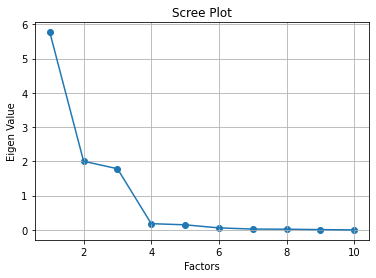

In [37]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = 'Varimax',impute = "drop",n_factors=X.shape[1])
fa.fit(X)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

Values close to -1 or 1 indicate that the factor has an influence on these variables. 

In [38]:
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(X)
pd.DataFrame(fa.loadings_,index=X.columns).to_csv('varimax.csv')
pd.DataFrame(fa.loadings_,index=X.columns)

,0,1,2
F_num_impr,0.987729,-0.018932,-0.048173
G_num_impr,0.989783,-0.014467,-0.052033
I_num_impr,0.959159,-0.007875,0.023001
M_num_impr,0.984143,-0.031257,-0.070140
N_num_impr,0.984619,-0.004384,-0.026007
tot_dip,0.917154,-0.049071,-0.094375
COD_PRO,-0.026316,0.998301,0.013900
PRO_COM,-0.026252,0.998302,0.014003
MEDIA,-0.130998,0.008490,0.930617
STD,0.018530,0.016815,0.876755


In [39]:
fa.get_communalities()

array([0.97828792, 0.98258797, 0.92057694, 0.97443464, 0.97016928,
       0.85248528, 0.99749098, 0.99749213, 0.88328042, 0.76932559])

In [40]:
X.columns

Index(['F_num_impr', 'G_num_impr', 'I_num_impr', 'M_num_impr', 'N_num_impr',
       'tot_dip', 'COD_PRO', 'PRO_COM', 'MEDIA', 'STD'],
      dtype='object')

In [41]:
factor1 = X[['F_num_impr', 'G_num_impr', 'I_num_impr', 'M_num_impr', 'N_num_impr',
       'tot_dip']]
factor2 = X[['COD_PRO', 'PRO_COM']]
factor3 = X [[ 'MEDIA', 'STD']]

In [42]:
import pingouin as pg

/home/selihadji/.virtualenvs/sorter/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [43]:
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.3106576693275791, array([0.11 , 0.479])) (0.003992158822913261, array([-0.407,  0.295])) (0.658051360261531, array([0.517, 0.758]))


In [44]:
new_var = pd.DataFrame(fa.fit_transform(X), columns=['Industrial_structure', 'Administrative_characteristics','Physical characteristics'], index=dataset3.Comune)
new_var

,Industrial_structure,Administrative_characteristics,Physical characteristics
Comune,,,
accumoli,-0.251398,0.021872,1.303075
acquacanina,-0.466517,-2.358466,-1.653087
acquasanta terme,-0.137398,-0.518686,0.739839
amandola,-0.061585,2.252926,0.055359
amatrice,0.015157,0.024995,1.672674
...,...,...,...
ussita,-0.272330,-0.575538,1.761041
valle castellana,-0.261649,0.449935,1.348087
vallo di nera,-0.344044,-0.091452,0.456228


In [45]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering

In [67]:
#model = KMeans(n_clusters=3)
#model = AffinityPropagation(damping=0.5)
model = AgglomerativeClustering(n_clusters=3)
yhat = model.fit_predict(new_var)
# retrieve unique clusters
clusters = np.unique(yhat)
clusters

array([0, 1, 2])

In [68]:
new_var['cluster'] = yhat

In [69]:
new_var['target'] = y.values

In [70]:
new_var[new_var.cluster == 0] =3

In [71]:
new_var_ = new_var.reset_index()

In [72]:
new_var_[['cluster', 'target']].groupby('cluster').describe()

target                                                        \
         count       mean       std        min        25%        50%   
cluster                                                                
1        113.0  11.064315  8.255129   0.266681   4.378298   9.220277   
2         15.0  35.109574  7.032374  26.816236  29.504240  34.630117   
3          3.0   3.000000  0.000000   3.000000   3.000000   3.000000   

                               
               75%        max  
cluster                        
1        16.034099  41.739060  
2        39.164176  50.164385  
3         3.000000   3.000000

In [73]:
import geopandas as gpd

In [74]:
map = gpd.read_file('/home/selihadji/Documenti/papers/terremoti/EARTHQUAKE/shp/Comuni2016/comuni2016.shp')
map['COMUNE'] = map['COMUNE'].str.lower()

In [75]:
#new_var_.to_csv('/home/selihadji/Scrivania/prova.csv')

In [76]:
#map.sort_values(by='COMUNE').to_csv('/home/selihadji/Scrivania/prova2.csv')

In [77]:
map[map['COMUNE'] == 'pievebovigliana']

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_P_CM,Shape_Leng,Shape_Area,geometry
5177,3,11,43,0,43,43037,043037,pievebovigliana,None,0,39691.3715,2.721461e+07,"MULTIPOLYGON (((13.11880 43.08928, 13.11925 43..."


In [82]:
plt.rcParams["figure.figsize"] = (10, 10)

<AxesSubplot:>

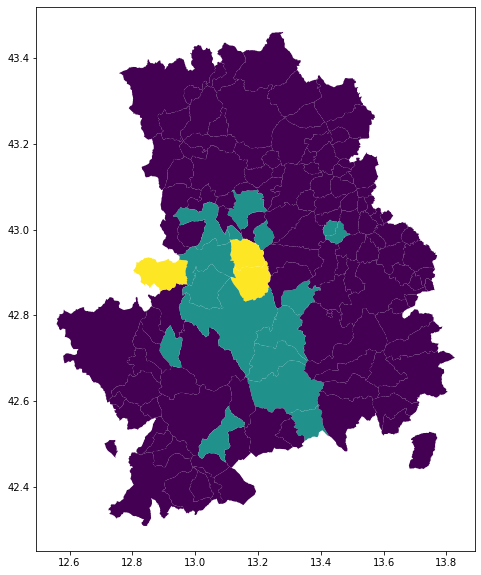

In [83]:
new_var_.columns = ['COMUNE','Industrial_structure','Administrative_characteristics','Physical_characteristics','cluster','target']
map = map.merge(new_var_,how='right')
map.plot(column='cluster')
#ax.set_ylim(41.8, 44)
#ax.set_xlim(11, 15)

In [ ]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt

import pylab


fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(new_var_['Administrative_characteristics'], new_var_['Industrial_structure'], new_var_['Physical characteristics'], c=new_var_['cluster'], s=new_var_['target'])
ax.set_xlabel('Administrative_characteristics')
ax.set_ylabel('Industrial structure')
ax.set_zlabel('Physical characteristics')
#ax.text(new_var_[new_var_['Comune'] == 'castelsantangelo sul nera']['Reconstruction'].values, new_var_[new_var_['Comune'] == 'castelsantangelo sul nera']['Physical characteristics'].values, new_var_[new_var_['Comune'] == 'castelsantangelo sul nera']['Industrial_structure'].values, '%s' % ('Castelsantangelo sul Nera'), size=20, zorder=1, color='k')
#ax.text(new_var_[new_var_['Comune'] =='accumoli']['Physical characteristics'][0],new_var_[new_var_['Comune'] =='accumoli']['Reconstruction'][0],new_var_[new_var_['Comune'] =='accumoli']['Industrial_structure'][0],  '%s' % (str('Accumoli')), size=12, zorder=10,color='k') 
#ax.text(new_var_[new_var_['Comune'] =='camerino']['Physical characteristics'][15],new_var_[new_var_['Comune'] =='camerino']['Reconstruction'][15],new_var_[new_var_['Comune'] =='camerino']['Industrial_structure'][15],  '%s' % (str('Camerino')), size=12, zorder=10, color='k') 
#ax.text(new_var_[new_var_['Comune'] =='amatrice']['Physical characteristics'][3],new_var_[new_var_['Comune'] =='amatrice']['Reconstruction'][3],new_var_[new_var_['Comune'] =='amatrice']['Industrial_structure'][3],  '%s' % (str('Amatrice')), size=12, zorder=10, color='k') 
#ax.text(new_var_[new_var_['Comune'] =='norcia']['Physical characteristics'][80],new_var_[new_var_['Comune'] =='norcia']['Reconstruction'][80],new_var_[new_var_['Comune'] =='norcia']['Industrial_structure'][80],  '%s' % (str('Norcia')), size=12, zorder=10, color='k') 
#ax.text(new_var_[new_var_['Comune'] =='sellano']['Physical characteristics'][108],new_var_[new_var_['Comune'] =='sellano']['Reconstruction'][108],new_var_[new_var_['Comune'] =='sellano']['Industrial_structure'][108],  '%s' % (str('Sellano')),  size=12, zorder=10, color='k') 
#fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
#ax.text(new_var_[new_var_['Comune'] =='sellano']['Physical characteristics'][108],new_var_[new_var_['Comune'] =='sellano']['Reconstruction'][108],new_var_[new_var_['Comune'] =='sellano']['Industrial_structure'][108], "Sellano", ha="center", va="center", rotation=45, size=8, bbox=dict(boxstyle="rarrow,pad=0.1", fc="w", ec="b", lw=1))
#ax.set_zlim3d(-4,2)
#ax.set_xlim3d(-2,4.5)
#ax.set_zlim3d(-2,2)
plt.show()
plt.savefig('3d.png')

## SVM

In [ ]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

### Features Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
svr_rbf = SVR(kernel="rbf", C=200, gamma=0.01, epsilon=0.2)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=1000, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [ ]:
X = new_var.reset_index()[['Administrative_characteristics','Physical characteristics', 'Industrial_structure']]
y = new_var['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svr_rbf.fit(X_train, y_train)


In [ ]:
y_pred = svr_rbf.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_pred, y_test)), '.3f'))
print("\nRMSE: ", rmse)

In [ ]:
pred = pd.DataFrame(y_pred, columns = ['pred'])
pd.concat([y_test.reset_index(drop=True), pred], axis=1).plot.bar(rot=0)